In [267]:
# Install NumPy
!pip install numpy

# Install pandas
!pip install pandas

# Install seaborn
!pip install seaborn

# Install statsmodels
!pip install statsmodels

# Install matplotlib
!pip install matplotlib

# Install scikit-learn (for StandardScaler)
!pip install scikit-learn


# EDA ON DIABETES PREDICTION DATAFRAME

In [268]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
import warnings

# Ignore warnings
warnings.simplefilter(action='ignore')

# Set seaborn theme and matplotlib style
sns.set()
plt.style.use("ggplot")

# Ensure plots are displayed inline in the notebook
%matplotlib inline


In [269]:
# read the dataset from dir
df = pd.read_csv("diabetes.csv")

In [270]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [271]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [272]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [273]:
# independent feature->'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#        'BMI', 'DiabetesPedigreeFunction', 'Age'
# dependent feature-> outcome

# descriptive statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


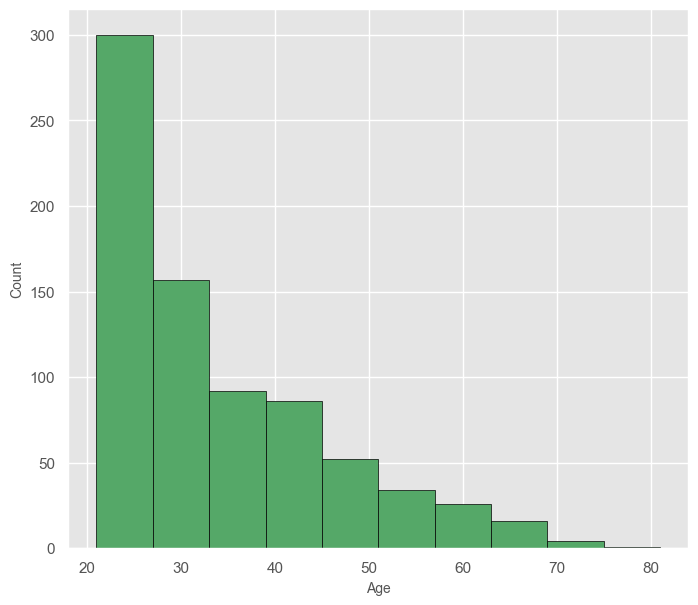

In [274]:
# (row, columns)
plt.figure(figsize=(8, 7))
plt.xlabel('Age', fontsize=10)
plt.ylabel('Count', fontsize=10)

# Plot the histogram for the 'Age' column with red bars and black edges
df['Age'].hist(edgecolor="black", color="g")

# Show the plot
plt.show()

In [275]:
df['Age'].max()

np.int64(81)

In [276]:
df['Age'].max()

np.int64(81)

In [277]:
print("MAX AGE: "+str(df['Age'].max()))
print("MIN AGE: "+str(df['Age'].min()))

MAX AGE: 81
MIN AGE: 21


In [278]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## EDA

### Plotting Density Graphs for Multiple Features

This code creates a grid of 4 rows and 2 columns to display density plots for various features from the DataFrame `df`. Each plot is positioned as follows:


<Axes: xlabel='Age', ylabel='Density'>

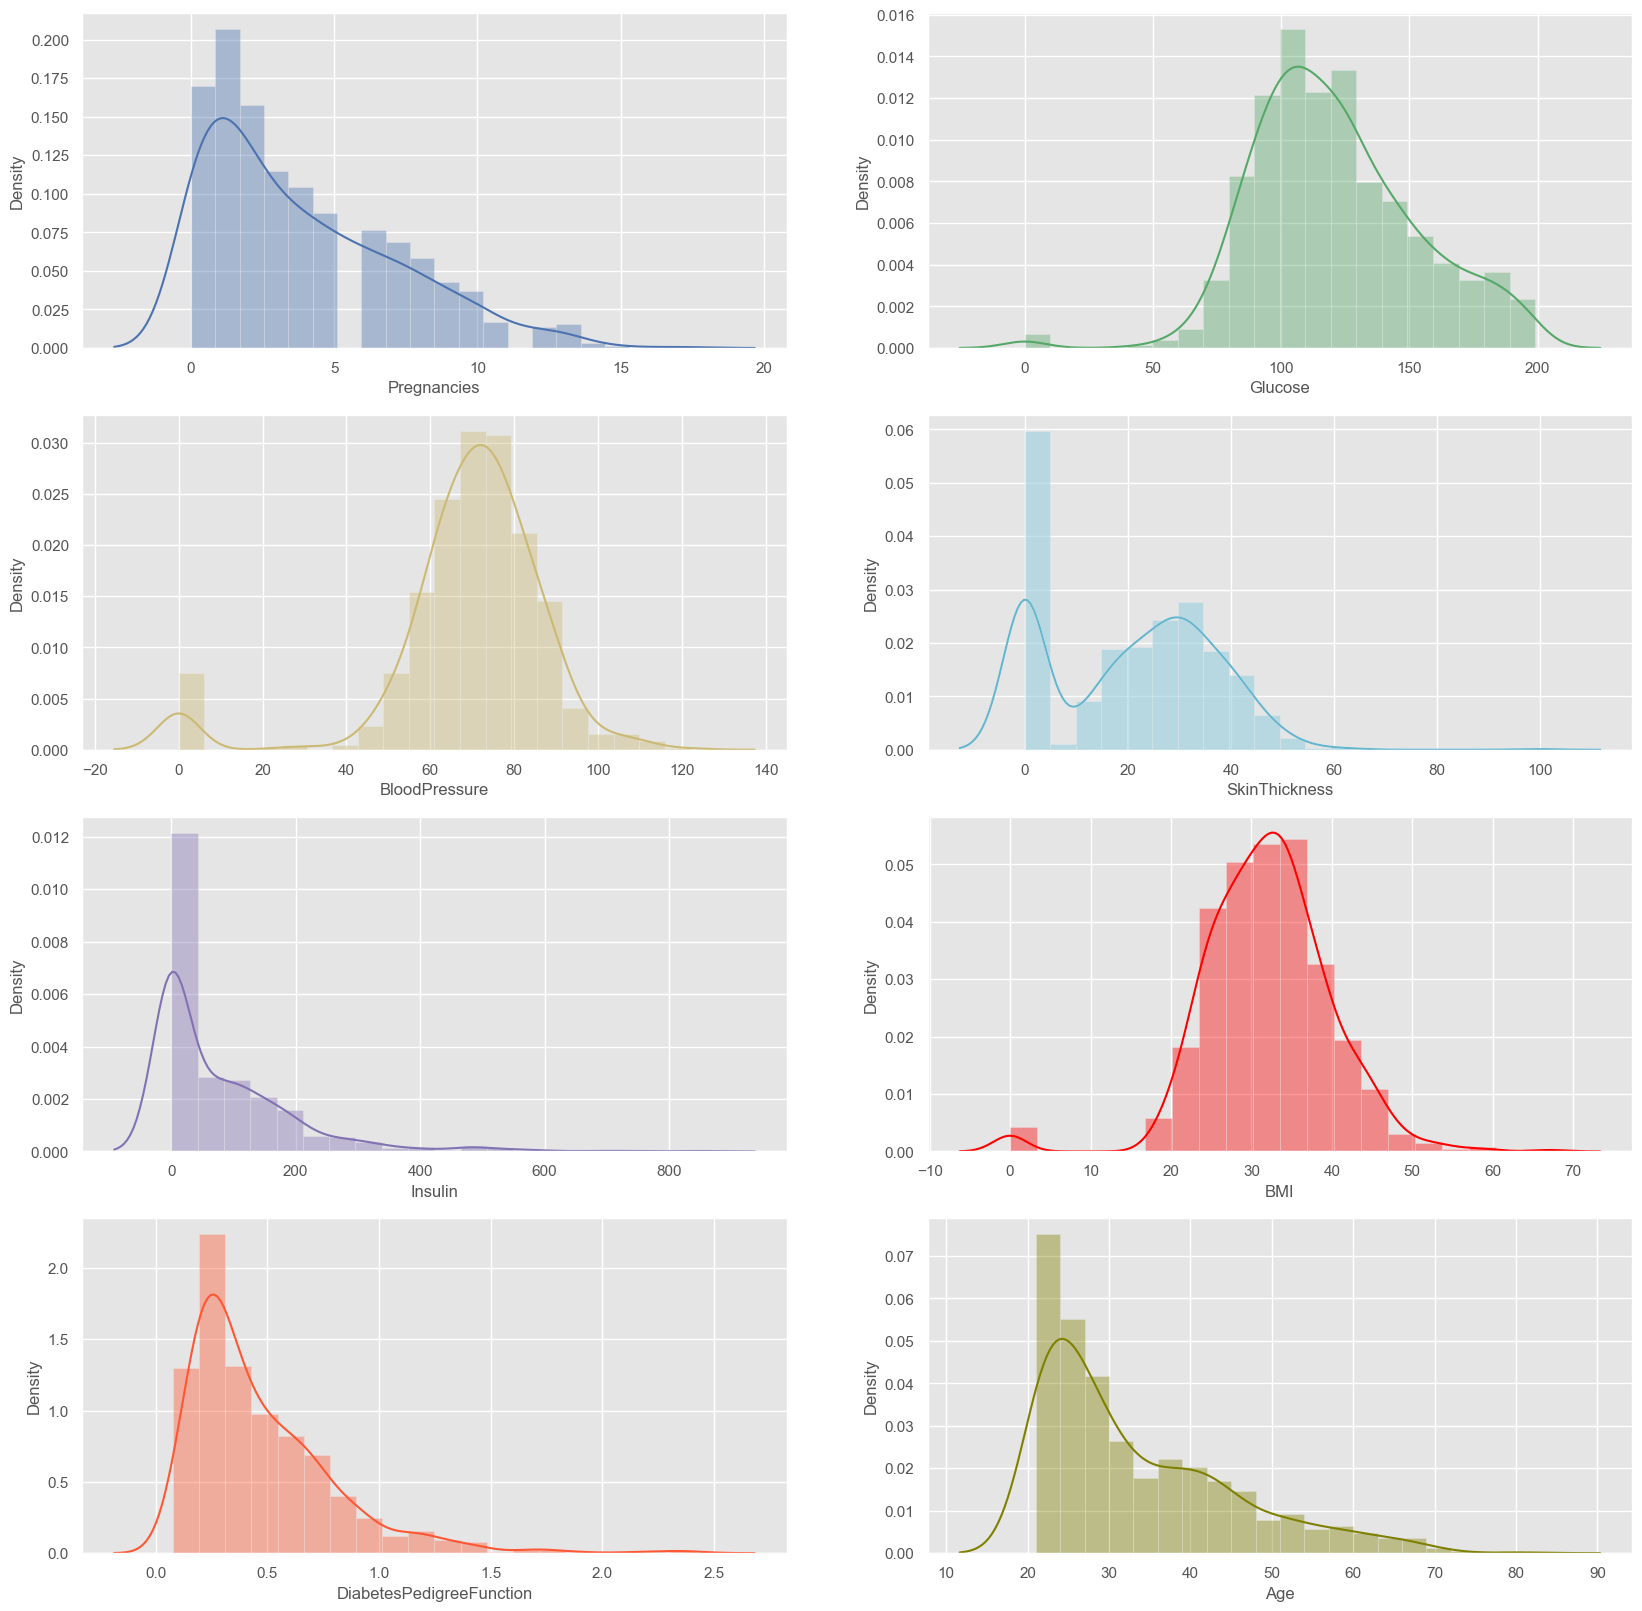

In [279]:
# density graph
# 4*2=8
# columns=2 figure
# having 4 row

# [0,0], [0,1]
# [1,0], [1,1]
# [2,0], [2,1]
# [3,0], [3,1]

fig,ax = plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0], color="b")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1], color="g")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0], color="y")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="w")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1], color="c")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0], color="m")
sns.distplot(df.BMI, bins=20, ax=ax[2,1], color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0], color='#FF5733')
sns.distplot(df.Age, bins=20, ax=ax[3,1], color='olive')

In [280]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Analyzing Feature Dependencies and Applying One-Hot Encoding

This code groups various features based on the target column and examines statistical summaries such as the mean and other dependencies. Techniques like one-hot encoding are applied to categorical features to transform them into a format suitable for machine learning models, ensuring that the dependencies between features and the target variable are well represented.


In [281]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [282]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [283]:
df.groupby("Outcome").agg({'Glucose':'mean'})


,Glucose
Outcome,
0,109.980000
1,141.257463


### Visualizing the Distribution of the Target Variable

This code creates two visualizations to analyze the distribution of the target variable (`Outcome`) in the dataset:
- A **pie chart** on the left shows the percentage distribution of each class in the target variable, with a slight explosion effect to enhance readability.
- A **count plot** on the right displays the absolute counts of each class in the target variable.

Both visualizations help in understanding the class distribution, which is crucial for further analysis and modeling.


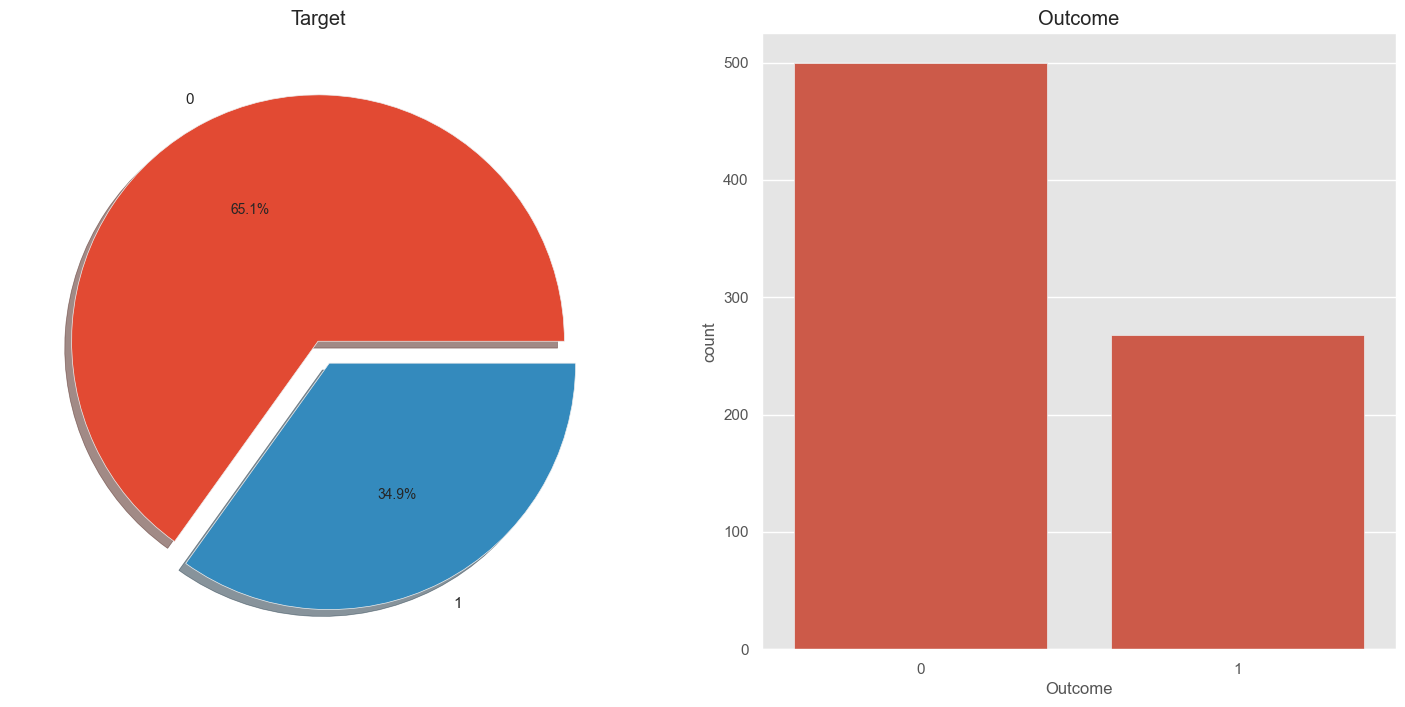

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting pie chart and countplot
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for 'Outcome'
df['Outcome'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title('Target')
ax[0].set_ylabel('')

# Countplot for 'Outcome' using keyword argument for x
sns.countplot(x='Outcome', data=df, ax=ax[1])
ax[1].set_title('Outcome')

plt.show()



In [285]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


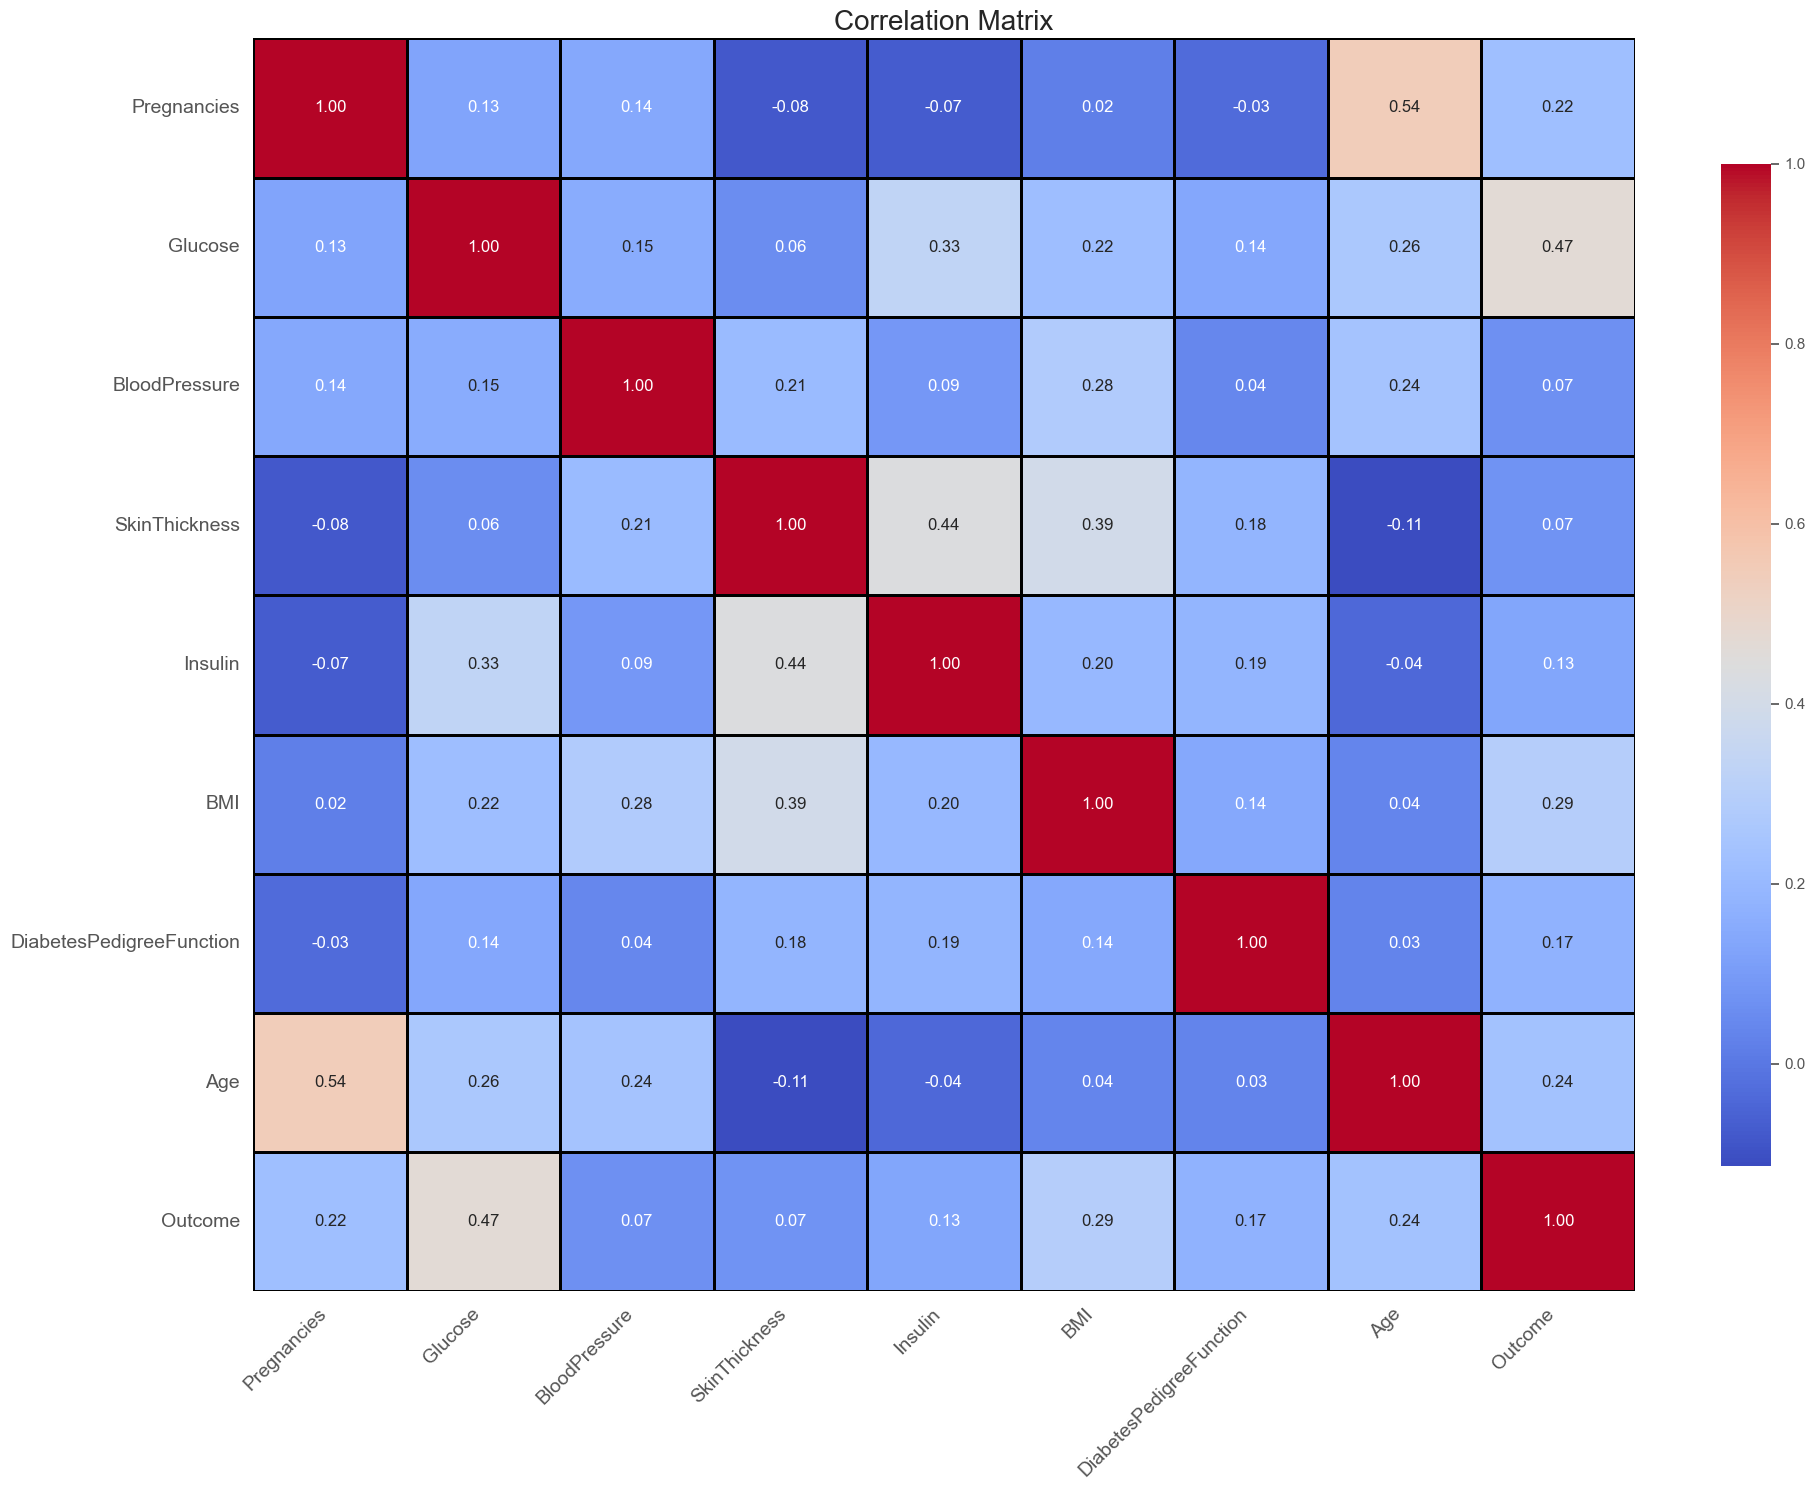

In [286]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a larger figure size and adjust font size
f, ax = plt.subplots(figsize=(20, 15))

# Create the heatmap with improved formatting
sns.heatmap(df.corr(), 
            annot=True,              # Show correlation coefficients
            fmt='.2f',               # Format to 2 decimal places
            annot_kws={"size": 12},   # Adjust annotation font size
            cmap='coolwarm',          # Color map for better contrast
            cbar_kws={"shrink": 0.8}, # Colorbar shrink to fit better
            linewidths=1,             # Add gridlines between cells
            linecolor='black',        # Gridline color
            ax=ax)

# Set the title and axis label sizes
ax.set_title("Correlation Matrix", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)

# Rotate x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)

# Display the plot
plt.tight_layout()  # Ensures everything fits without overlapping
plt.show()


In [287]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age']] = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)



## DATA PREPROCESSING PART

### HANDING MISSING DATA

In [288]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [289]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [290]:
!pip install missingno

<Axes: >

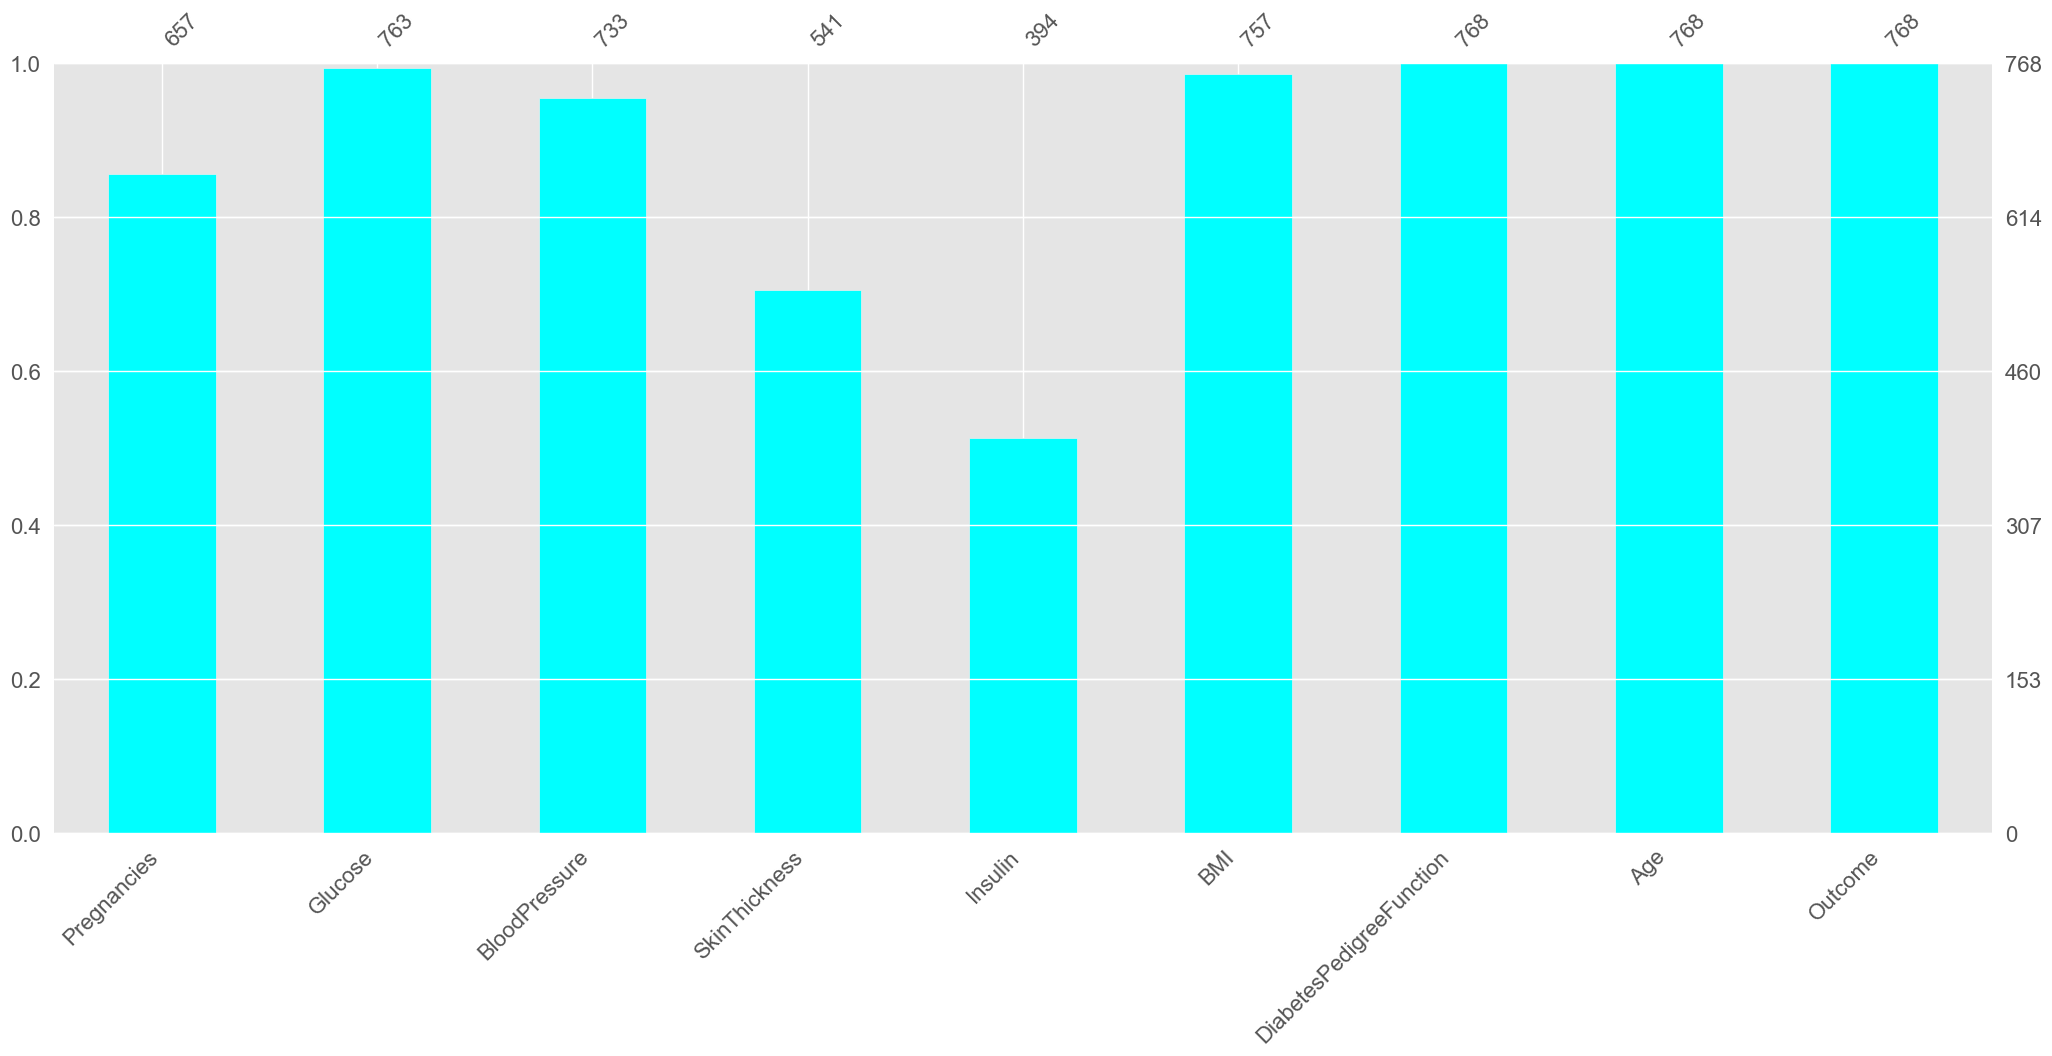

In [291]:
import missingno as msno
msno.bar(df, color="cyan")

In [292]:
#median
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [293]:
columns = df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0 ) & (df[i].isnull()), i] = median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1 ) & (df[i].isnull()), i] = median_target(i)[i][1]

In [294]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [295]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### HANDLING DUPLICATES

In [296]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [297]:
df.drop_duplicates(inplace=True)

### Visualizing Feature Relationships with Pair Plot

This code generates a **pair plot** to visualize the relationships between multiple features in the dataset, with different colors representing the classes of the target variable (`Outcome`). Each subplot displays the distribution of a feature against another, helping to identify potential correlations or patterns in the data. The plot is set with a custom size and a color palette (`husl`) for enhanced visual clarity.


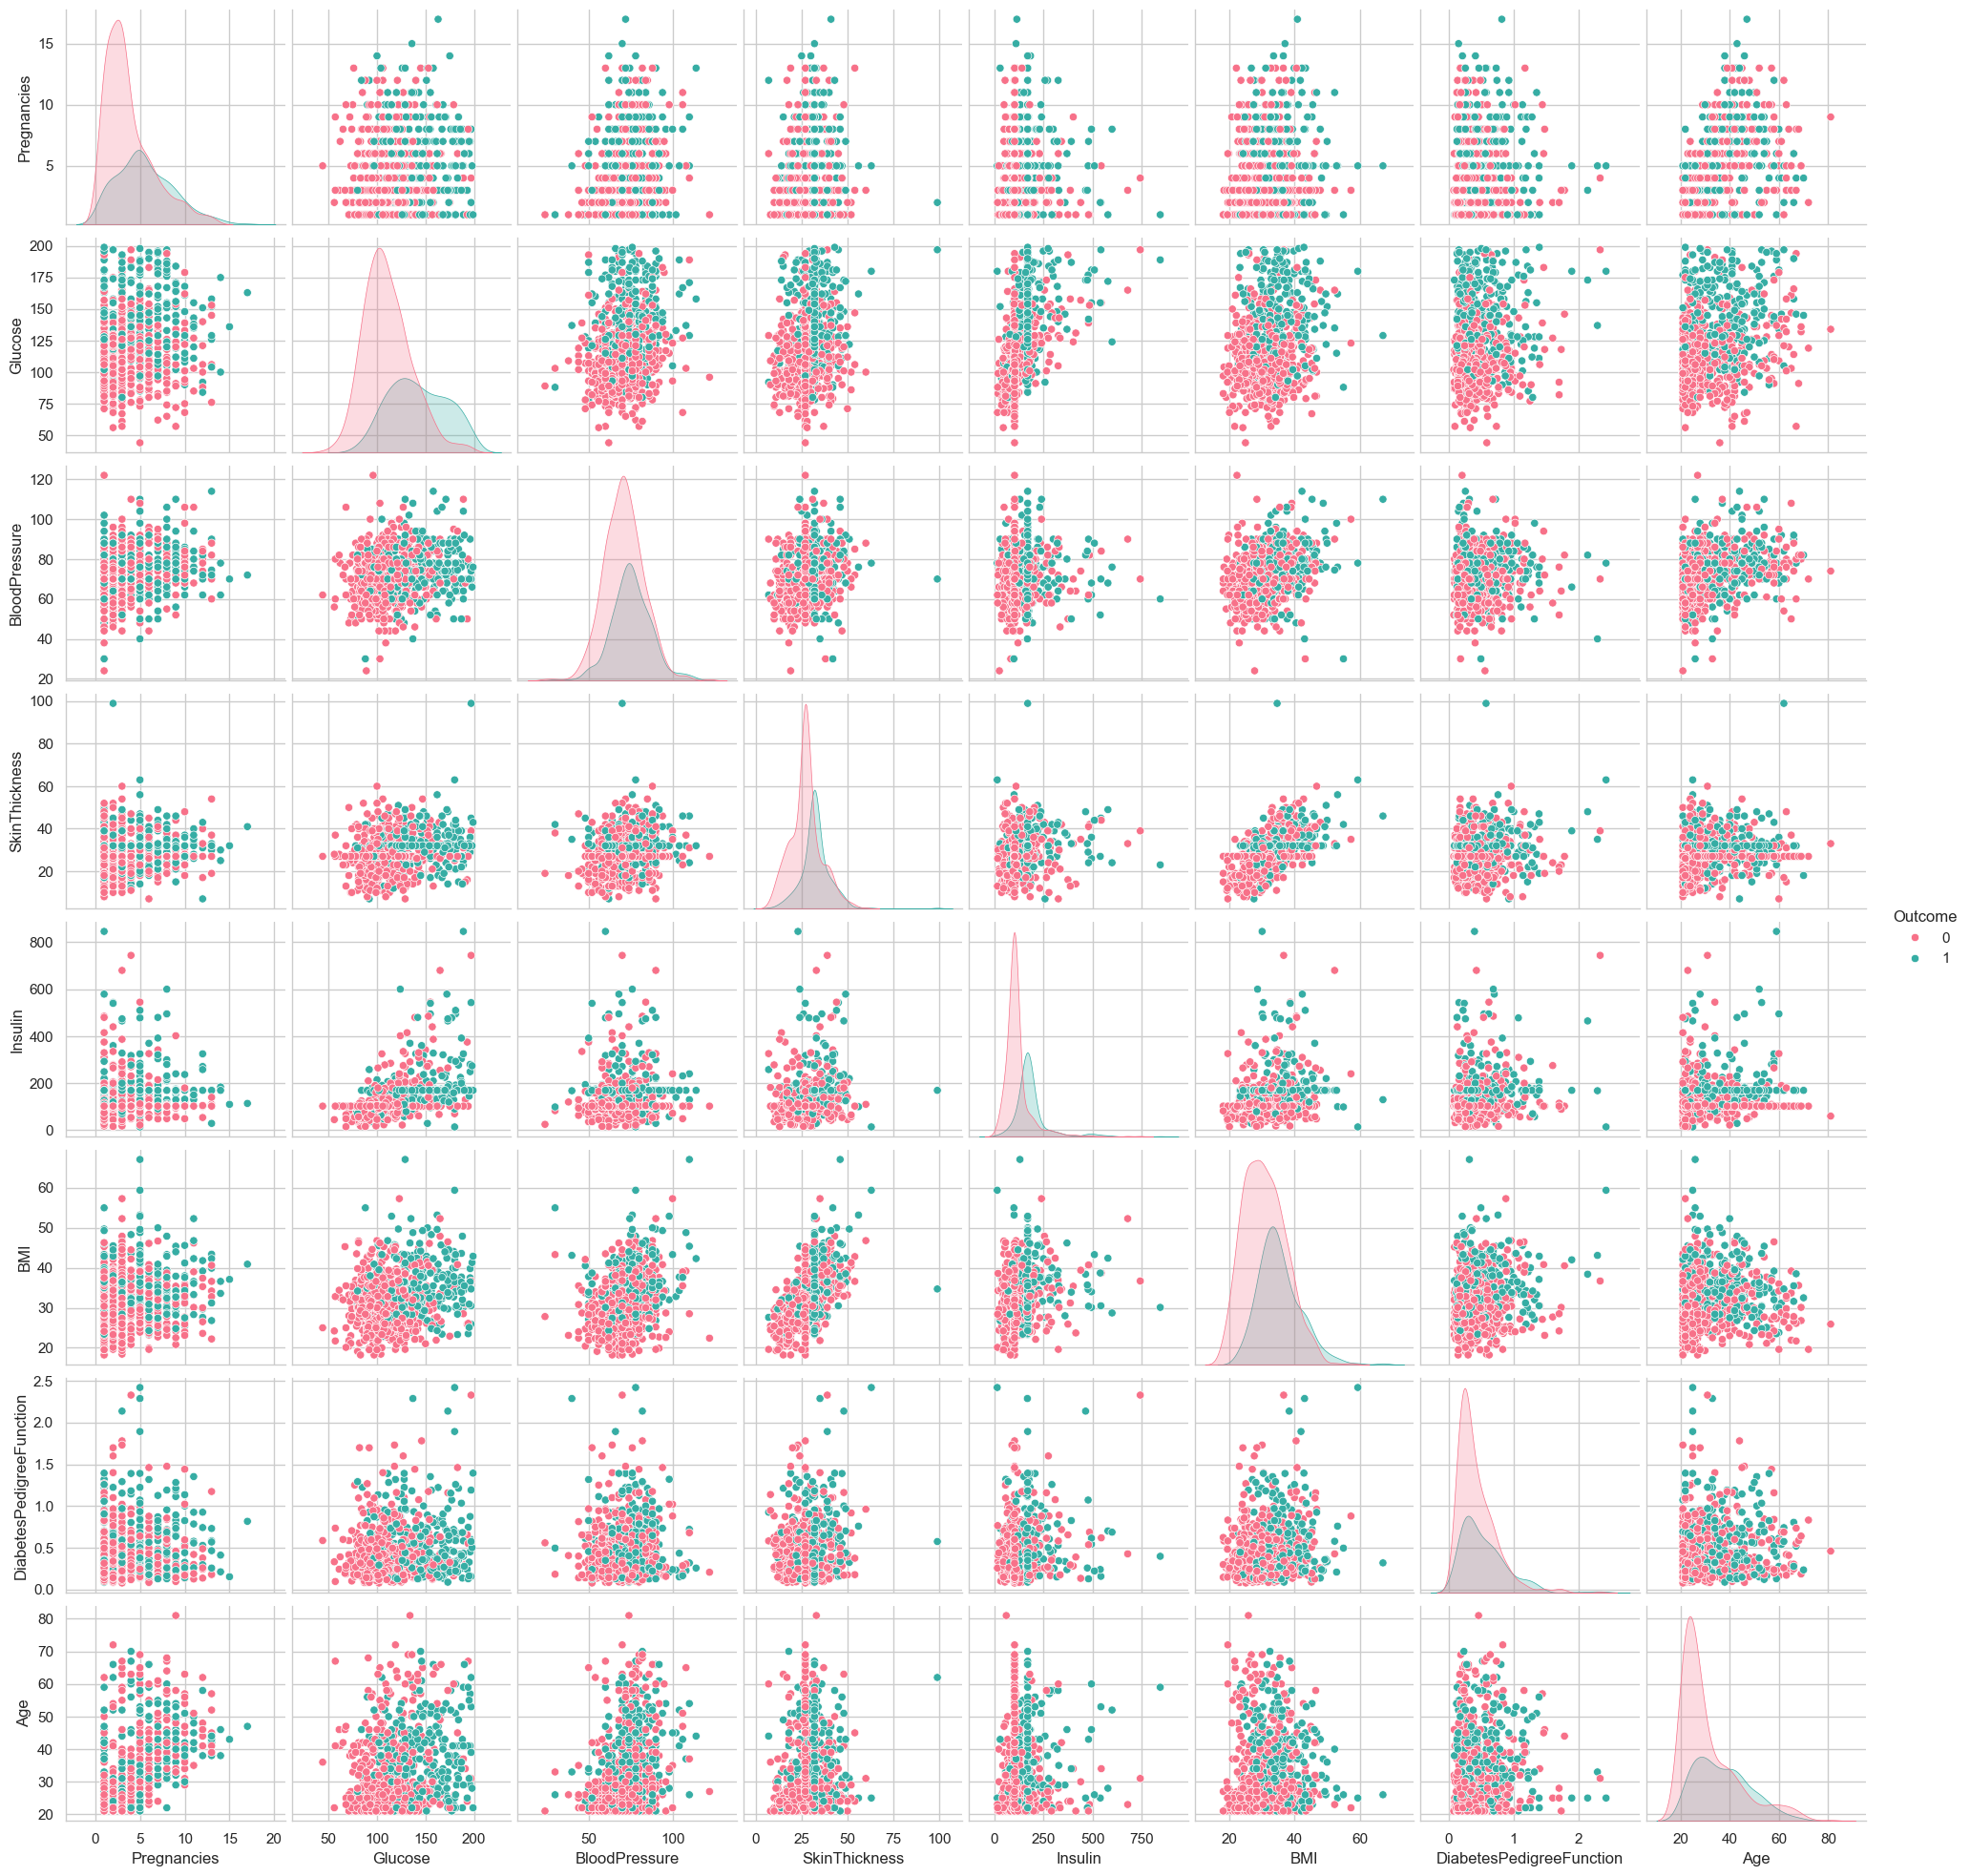

In [298]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Create a pair plot with custom size and color palette
p = sns.pairplot(df, hue="Outcome", height=2.5, palette="husl")

# Show the plot
plt.show()


### Outlier Detection Using the IQR Method

This code implements the Interquartile Range (IQR) method to detect outliers in the dataset. For each feature in the DataFrame (`df`), the following steps are performed:

1. Calculate the first quartile (Q1) and the third quartile (Q3).
2. Compute the IQR as the difference between Q3 and Q1.
3. Define the lower and upper bounds for outlier detection using the formula:
   - **Lower Bound**: \( Q1 - 1.5 \times \text{IQR} \)
   - **Upper Bound**: \( Q3 + 1.5 \times \text{IQR} \)
4. Check if any values in the feature exceed the upper bound. If outliers are detected, it prints the feature name followed by "yes"; otherwise, it prints "no".

This method helps identify features that may contain outlier values, which could significantly affect the results of data analysis or modeling.


In [299]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

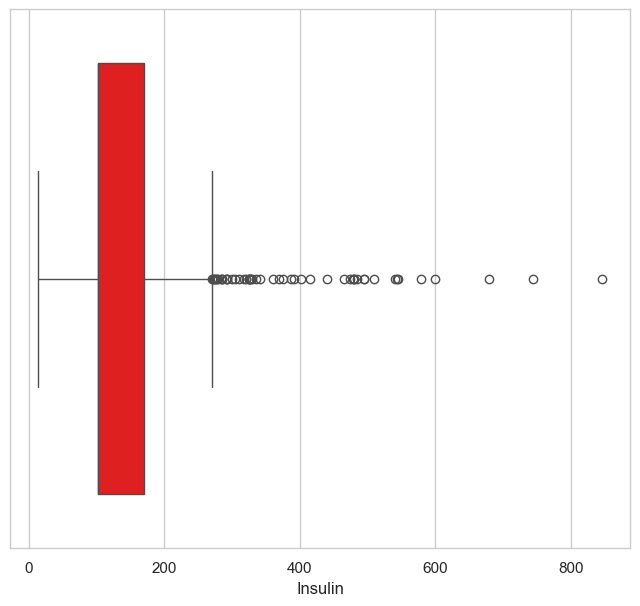

In [300]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [301]:
Q1 = df.Insulin.quantile(0.25)
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

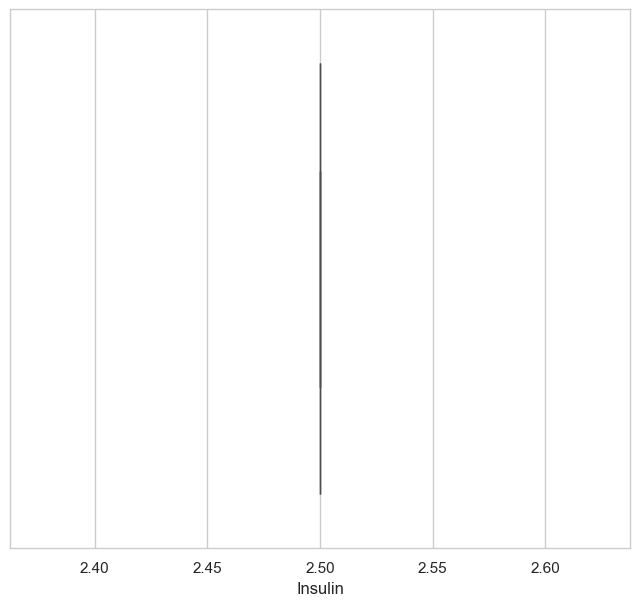

In [302]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Insulin"], color="red")

In [303]:
df_cleaned = df.dropna()
df_cleaned = df.fillna(df.mean())


### Outlier Detection Using Local Outlier Factor (LOF)

This code applies the **Local Outlier Factor (LOF)** algorithm from the `sklearn` library to detect outliers in the dataset. The steps involved are as follows:

1. **Import the LocalOutlierFactor class** from `sklearn.neighbors`.
2. **Instantiate the LOF model** with a specified number of neighbors (in this case, 10).
3. **Fit the model** to the DataFrame (`df`) and predict the outliers.

The LOF method identifies points that are significantly different from their neighbors, making it effective for detecting local outliers in multi-dimensional data. The results can be further analyzed to assess which data points are classified as outliers.

In [304]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [305]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,2.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,2.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,2.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,2.5,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,2.5,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

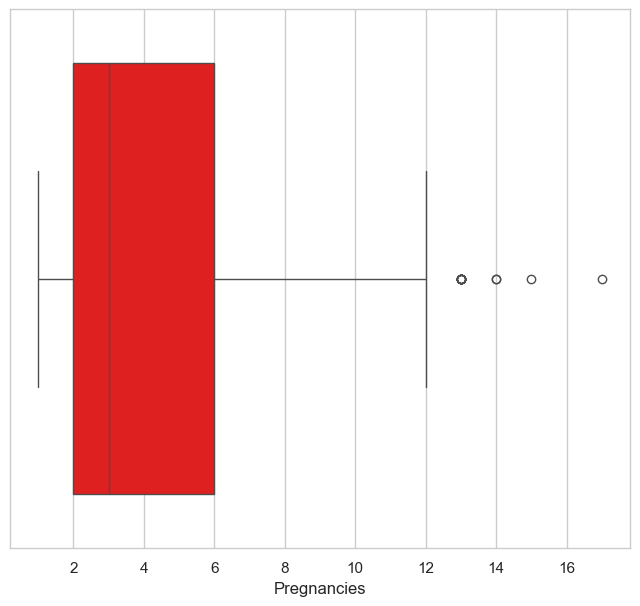

In [306]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [307]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.40675128, -2.49956278, -2.36022793, -2.17280727, -2.13145262,
       -1.87180053, -1.86936849, -1.73419322, -1.71561459, -1.64411165,
       -1.63806192, -1.55902976, -1.53746046, -1.52795547, -1.50732773,
       -1.50059478, -1.48616972, -1.47180168, -1.46837896, -1.46807091])

In [308]:
thresold = np.sort(df_scores)[7]

In [309]:
thresold

np.float64(-1.7341932160358517)

In [310]:
outlier = df_scores>thresold

In [311]:
df = df[outlier]

In [312]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,2.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,2.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,2.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,2.5,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,2.5,43.1,2.288,33,1


In [313]:
df.shape


(760, 9)

### Feature Engineering: Creating a Categorical Series for BMI

This code snippet demonstrates the creation of a new categorical feature, `NewBMI`, which classifies individuals based on their body mass index (BMI) into distinct categories:

- Underweight
- Normal
- Overweight
- Obesity 1
- Obesity 2
- Obesity 3

The series is created using the `pd.Series` function from the `pandas` library, with the `dtype` set to "category" to optimize memory usage and improve performance in further analysis. This new feature can be used for more detailed analysis or as a predictor in machine learning models.


In [314]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

<Axes: xlabel='Pregnancies'>

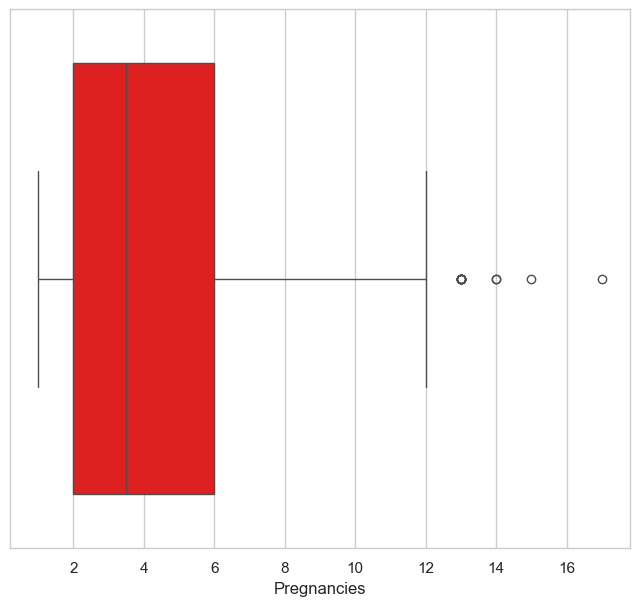

In [315]:
plt.figure(figsize=(8,7))
sns.boxplot(x= df["Pregnancies"], color="red")

In [316]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [317]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5) & df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"]>24.9) & df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
df.loc[(df["BMI"]>29.9) & df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
df.loc[(df["BMI"]>34.9) & df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [318]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,2.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,2.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,2.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,2.5,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,2.5,43.1,2.288,33,1,Obesity 3


In [319]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [320]:
df = df.assign(NewInsulinScore=df.apply(set_insuline, axis=1))

In [321]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,2.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,2.5,26.6,0.351,31,0,Obesity 2,Abnormal
2,8.0,183.0,64.0,32.0,2.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,2.5,28.1,0.167,21,0,Obesity 2,Abnormal
4,5.0,137.0,40.0,35.0,2.5,43.1,2.288,33,1,Obesity 3,Abnormal


In [322]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 70) & (df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df.loc[(df["Glucose"] > 99) & (df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df.loc[df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [323]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,2.5,33.6,0.627,50,1,Obesity 2,Abnormal,Secret
1,1.0,85.0,66.0,29.0,2.5,26.6,0.351,31,0,Obesity 2,Abnormal,Normal
2,8.0,183.0,64.0,32.0,2.5,23.3,0.672,32,1,Obesity 2,Abnormal,Secret
3,1.0,89.0,66.0,23.0,2.5,28.1,0.167,21,0,Obesity 2,Abnormal,Normal
4,5.0,137.0,40.0,35.0,2.5,43.1,2.288,33,1,Obesity 3,Abnormal,Secret


In [324]:
# One hot encoding
df = pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [325]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,2.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,2.5,26.6,0.351,31,0,False,True,False,False,False,False,True,False,False
2,8.0,183.0,64.0,32.0,2.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,2.5,28.1,0.167,21,0,False,True,False,False,False,False,True,False,False
4,5.0,137.0,40.0,35.0,2.5,43.1,2.288,33,1,False,False,True,False,False,False,False,False,True


In [326]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [327]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [329]:
categorical_df = df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [330]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,True
1,False,True,False,False,False,False,True,False,False
2,False,True,False,False,False,False,False,False,True
3,False,True,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,True


In [331]:
y=df['Outcome']
X=df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [332]:
cols = X.columns
index = X.index

In [333]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,2.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,2.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,2.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,2.5,28.1,0.167,21
4,5.0,137.0,40.0,35.0,2.5,43.1,2.288,33


In [334]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [335]:
true_data = df.copy()

In [336]:
# Handling missing values
df.fillna(df.mean(), inplace=True)  # Replace NaN with column means

# Removing duplicates
df.drop_duplicates(inplace=True)


### Feature Scaling: Standardization and Normalization

This code performs feature scaling on the dataset using two different methods: standardization and normalization.

1. **Standardization**:
   - The `StandardScaler` from the `sklearn.preprocessing` module is used to standardize specific features (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, and `Age`).
   - Standardization transforms the data to have a mean of 0 and a standard deviation of 1, making it suitable for algorithms sensitive to the scale of data.

2. **Normalization**:
   - The `MinMaxScaler` is applied to normalize the features related to obesity (`NewBMI_Obesity 1`, `NewBMI_Obesity 2`, `NewBMI_Obesity 3`).
   - Normalization rescales the features to a fixed range, typically [0, 1], which is helpful for algorithms that require the input features to be bounded.

These scaling techniques are crucial in preparing data for machine learning algorithms, ensuring that no feature dominates due to its scale.


In [337]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardizing features
scaler = StandardScaler()
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']] = scaler.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']])

# Normalizing features
minmax_scaler = MinMaxScaler()
df[['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3']] = minmax_scaler.fit_transform(df[['NewBMI_Obesity 1', 'NewBMI_Obesity 2', 'NewBMI_Obesity 3']])


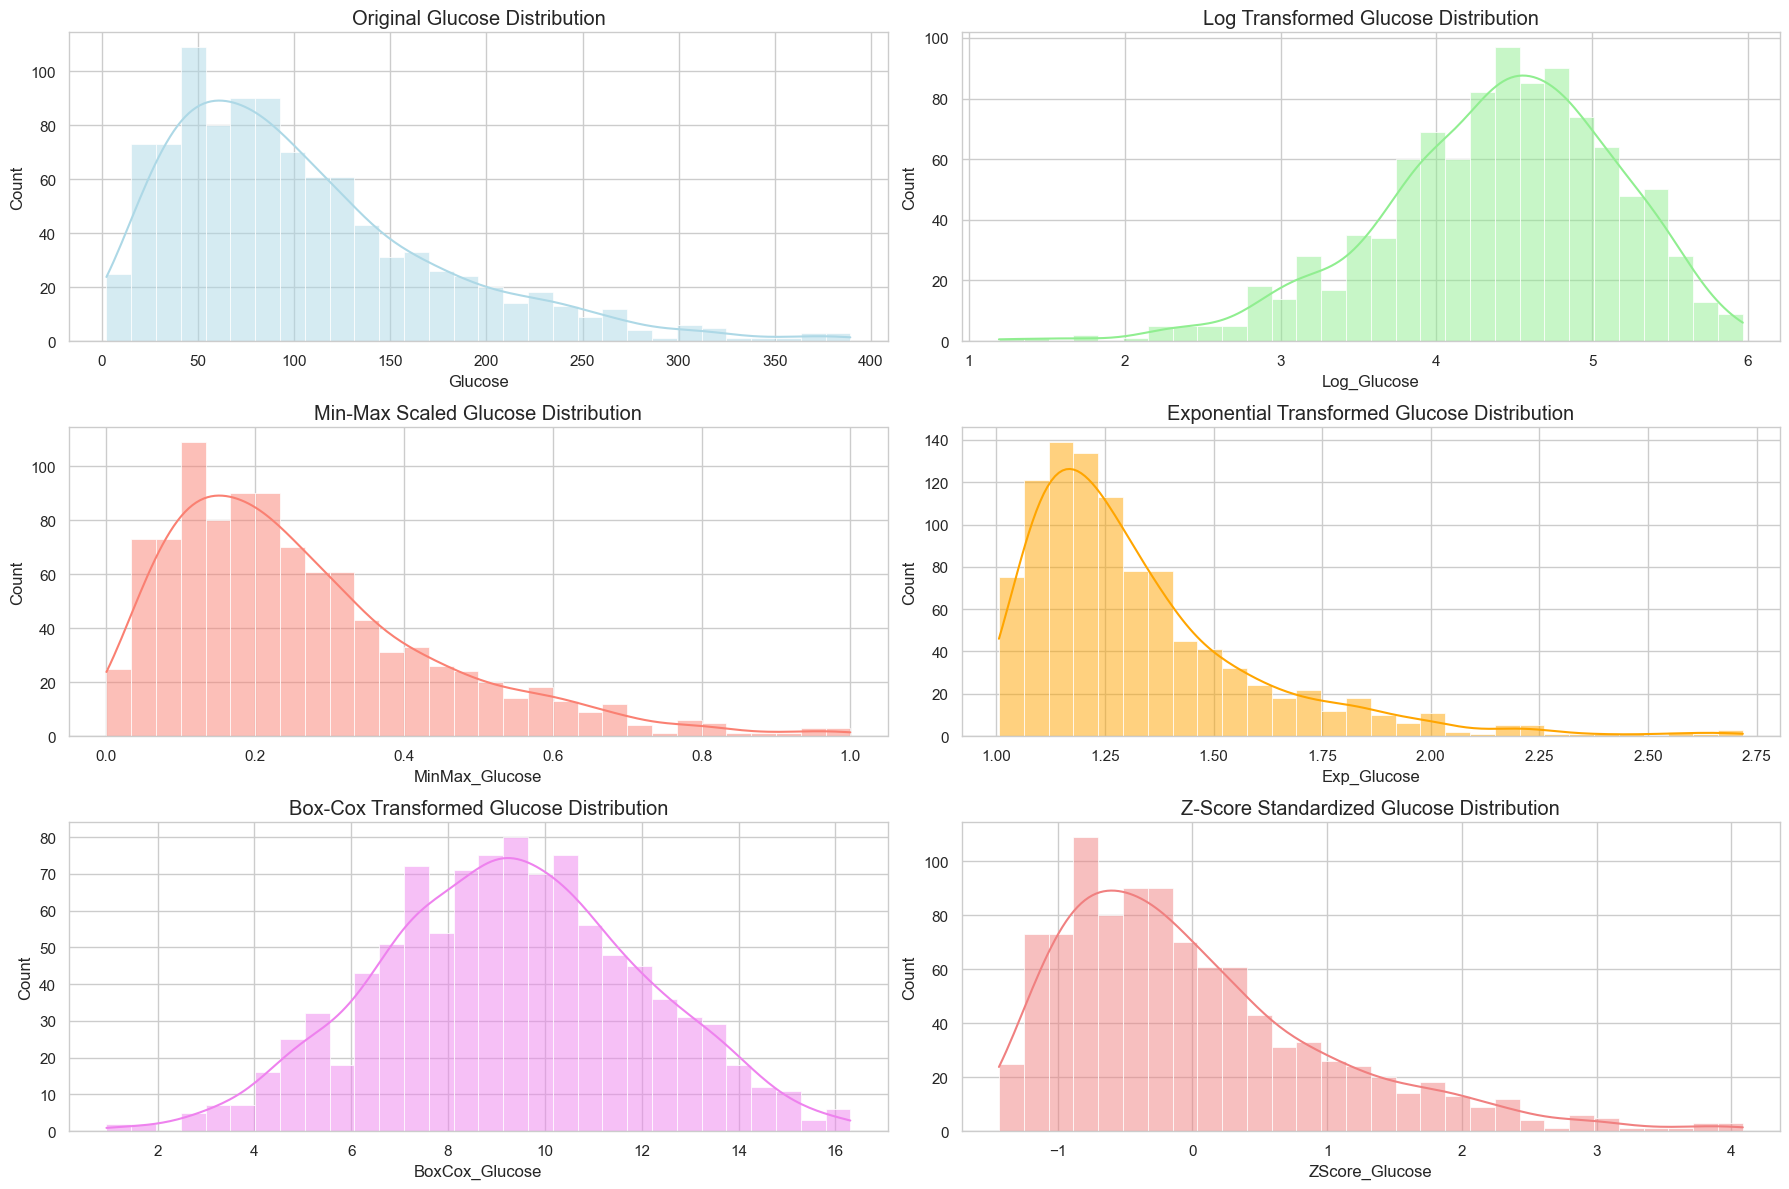

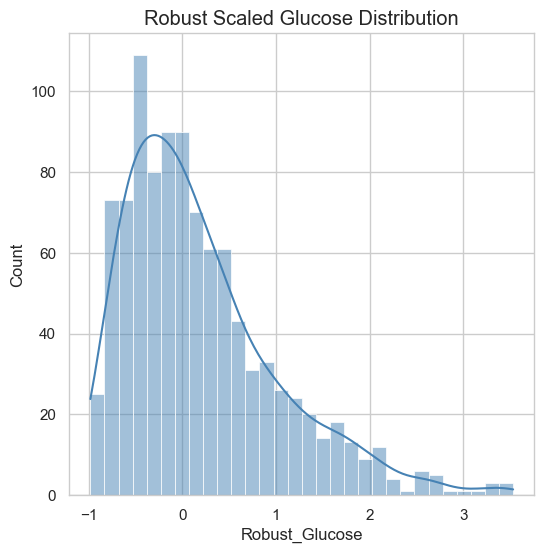

In [338]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your actual data

# For demonstration, let's create a synthetic DataFrame
np.random.seed(42)
data = {
    'Glucose': np.random.gamma(shape=2, scale=50, size=1000),
    'Insulin': np.random.gamma(shape=2, scale=15, size=1000),
    'BMI': np.random.normal(loc=30, scale=5, size=1000)
}
df = pd.DataFrame(data)

# Step 1: Apply Various Transformations
# Log Transformation
df['Log_Glucose'] = np.log1p(df['Glucose'])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df['MinMax_Glucose'] = minmax_scaler.fit_transform(df[['Glucose']])

# Exponential Transformation
df['Exp_Glucose'] = np.exp(df['Glucose'] / df['Glucose'].max())

# Gaussian Transformation (Box-Cox)
df['BoxCox_Glucose'], _ = boxcox(df['Glucose'] + 1e-5)  # Adding a small value to avoid zero

# Z-Score Standardization
scaler = StandardScaler()
df['ZScore_Glucose'] = scaler.fit_transform(df[['Glucose']])

# Robust Scaling
robust_scaler = RobustScaler()
df['Robust_Glucose'] = robust_scaler.fit_transform(df[['Glucose']])

# Step 2: Plot Transformed Features with Different Colors
plt.figure(figsize=(18, 12))

# Original Feature Distribution
plt.subplot(3, 2, 1)
sns.histplot(df['Glucose'], bins=30, kde=True, color='lightblue')
plt.title('Original Glucose Distribution')

# Log Transformation
plt.subplot(3, 2, 2)
sns.histplot(df['Log_Glucose'], bins=30, kde=True, color='lightgreen')
plt.title('Log Transformed Glucose Distribution')

# Min-Max Scaling
plt.subplot(3, 2, 3)
sns.histplot(df['MinMax_Glucose'], bins=30, kde=True, color='salmon')
plt.title('Min-Max Scaled Glucose Distribution')

# Exponential Transformation
plt.subplot(3, 2, 4)
sns.histplot(df['Exp_Glucose'], bins=30, kde=True, color='orange')
plt.title('Exponential Transformed Glucose Distribution')

# Gaussian Transformation (Box-Cox)
plt.subplot(3, 2, 5)
sns.histplot(df['BoxCox_Glucose'], bins=30, kde=True, color='violet')
plt.title('Box-Cox Transformed Glucose Distribution')

# Z-Score Standardization
plt.subplot(3, 2, 6)
sns.histplot(df['ZScore_Glucose'], bins=30, kde=True, color='lightcoral')
plt.title('Z-Score Standardized Glucose Distribution')

plt.tight_layout()
plt.show()

# Robust Scaling
plt.figure(figsize=(6, 6))
sns.histplot(df['Robust_Glucose'], bins=30, kde=True, color='steelblue')
plt.title('Robust Scaled Glucose Distribution')
plt.show()



### Data Transformation and Visualization for Glucose Feature

This code snippet demonstrates various data transformation techniques applied to the `Glucose` feature in the dataset, along with visualizations of their distributions. The transformations include:

1. **Log Transformation**:
   - The `Log_Glucose` feature is created using a logarithmic transformation to reduce skewness and handle outliers effectively.

2. **Min-Max Scaling**:
   - The `MinMax_Glucose` feature is scaled to a range of [0, 1] using Min-Max scaling, which helps in normalizing the feature for machine learning models.

3. **Exponential Transformation**:
   - The `Exp_Glucose` feature is generated by applying an exponential transformation, which can help in understanding the distribution characteristics.

4. **Gaussian Transformation (Box-Cox)**:
   - The `BoxCox_Glucose` feature is derived using the Box-Cox transformation, which aims to make the data more Gaussian-like.

5. **Z-Score Standardization**:
   - The `ZScore_Glucose` feature is standardized to have a mean of 0 and a standard deviation of 1, which is important for algorithms sensitive to feature scaling.

6. **Robust Scaling**:
   - The `Robust_Glucose` feature is scaled using Robust scaling, which is robust to outliers.

The distributions of these transformed features are visualized using histograms with Kernel Density Estimates (KDE) to illustrate how the transformations affect the data. Each subplot represents the distribution of a transformed feature, allowing for a clear comparison of the effects of different scaling techniques on the `Glucose` feature.


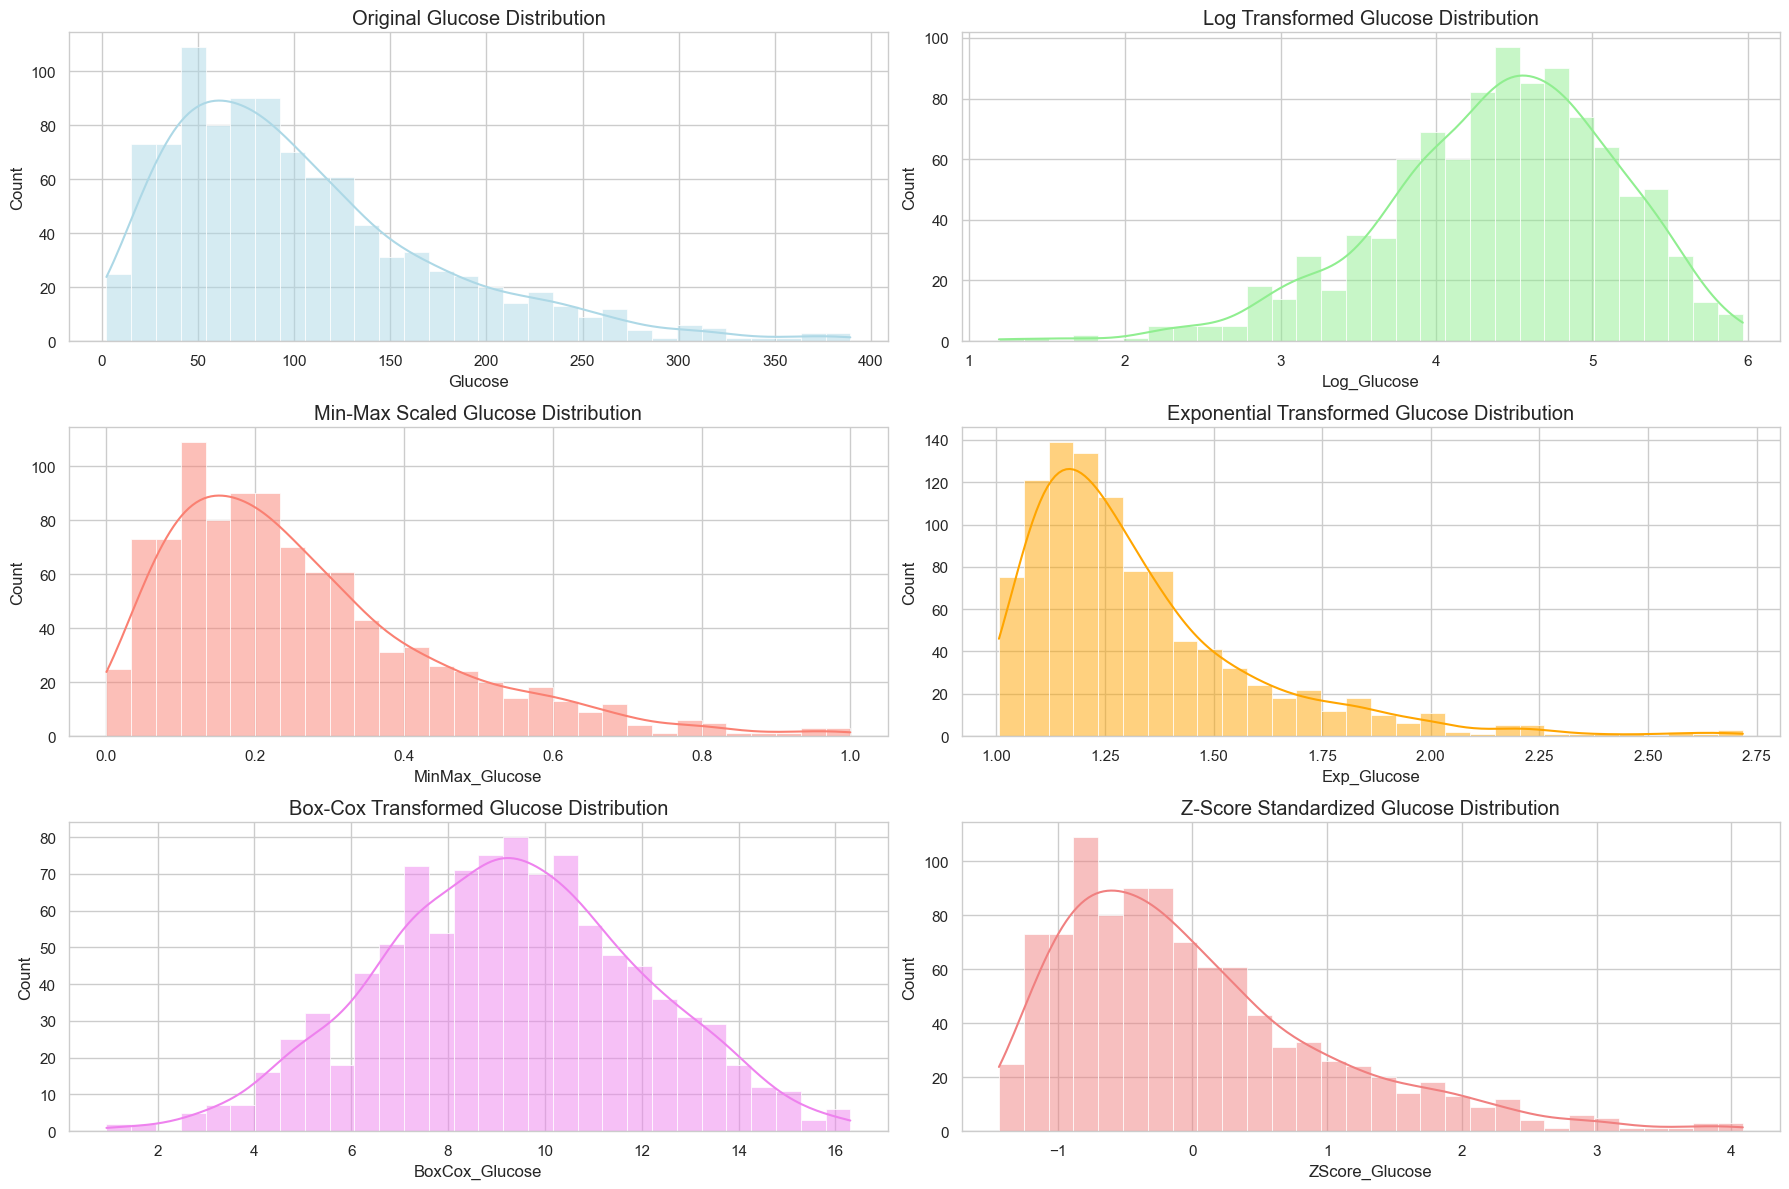

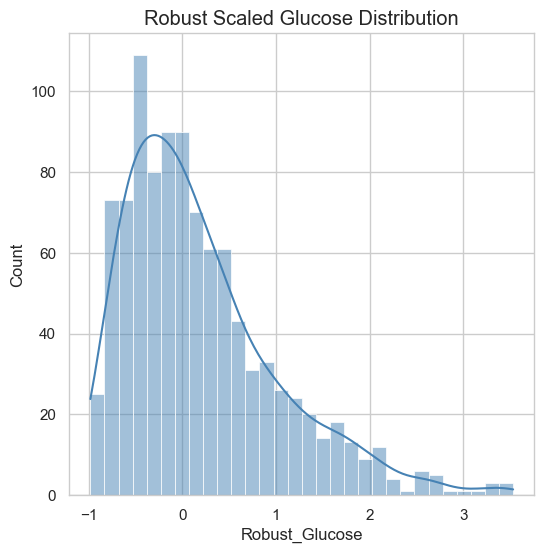

In [339]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import boxcox

# Sample DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your actual data

# For demonstration, let's create a synthetic DataFrame
np.random.seed(42)
data = {
    'Glucose': np.random.gamma(shape=2, scale=50, size=1000),
    'Insulin': np.random.gamma(shape=2, scale=15, size=1000),
    'BMI': np.random.normal(loc=30, scale=5, size=1000)
}
df = pd.DataFrame(data)

# Step 1: Apply Various Transformations
# Log Transformation
df['Log_Glucose'] = np.log1p(df['Glucose'])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df['MinMax_Glucose'] = minmax_scaler.fit_transform(df[['Glucose']])

# Exponential Transformation
df['Exp_Glucose'] = np.exp(df['Glucose'] / df['Glucose'].max())

# Gaussian Transformation (Box-Cox)
df['BoxCox_Glucose'], _ = boxcox(df['Glucose'] + 1e-5)  # Adding a small value to avoid zero

# Z-Score Standardization
scaler = StandardScaler()
df['ZScore_Glucose'] = scaler.fit_transform(df[['Glucose']])

# Robust Scaling
robust_scaler = RobustScaler()
df['Robust_Glucose'] = robust_scaler.fit_transform(df[['Glucose']])

# Step 2: Plot Transformed Features with Different Colors
plt.figure(figsize=(18, 12))

# Original Feature Distribution
plt.subplot(3, 2, 1)
sns.histplot(df['Glucose'], bins=30, kde=True, color='lightblue')
plt.title('Original Glucose Distribution')

# Log Transformation
plt.subplot(3, 2, 2)
sns.histplot(df['Log_Glucose'], bins=30, kde=True, color='lightgreen')
plt.title('Log Transformed Glucose Distribution')

# Min-Max Scaling
plt.subplot(3, 2, 3)
sns.histplot(df['MinMax_Glucose'], bins=30, kde=True, color='salmon')
plt.title('Min-Max Scaled Glucose Distribution')

# Exponential Transformation
plt.subplot(3, 2, 4)
sns.histplot(df['Exp_Glucose'], bins=30, kde=True, color='orange')
plt.title('Exponential Transformed Glucose Distribution')

# Gaussian Transformation (Box-Cox)
plt.subplot(3, 2, 5)
sns.histplot(df['BoxCox_Glucose'], bins=30, kde=True, color='violet')
plt.title('Box-Cox Transformed Glucose Distribution')

# Z-Score Standardization
plt.subplot(3, 2, 6)
sns.histplot(df['ZScore_Glucose'], bins=30, kde=True, color='lightcoral')
plt.title('Z-Score Standardized Glucose Distribution')

plt.tight_layout()
plt.show()

# Robust Scaling
plt.figure(figsize=(6, 6))
sns.histplot(df['Robust_Glucose'], bins=30, kde=True, color='steelblue')
plt.title('Robust Scaled Glucose Distribution')
plt.show()



In [340]:
true_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,2.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,2.5,26.6,0.351,31,0,False,True,False,False,False,False,True,False,False
2,8.0,183.0,64.0,32.0,2.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,2.5,28.1,0.167,21,0,False,True,False,False,False,False,True,False,False
4,5.0,137.0,40.0,35.0,2.5,43.1,2.288,33,1,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,2.5,32.9,0.171,63,0,False,True,False,False,False,False,False,True,False
764,2.0,122.0,70.0,27.0,2.5,36.8,0.340,27,0,False,True,False,False,False,False,False,True,False
765,5.0,121.0,72.0,23.0,2.5,26.2,0.245,30,0,False,True,False,False,False,False,False,True,False
766,1.0,126.0,60.0,32.0,2.5,30.1,0.349,47,1,False,True,False,False,False,False,False,True,False


In [341]:
true_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewGlucose_Low', 'NewGlucose_Normal',
       'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [342]:

# Check for NaNs in the Glucose column
print(true_data['Glucose'].isna().sum())

# Check for NaNs in the groups
print(obese_group.isna().sum(), non_obese_group.isna().sum())

0
0 0


In [343]:
# Drop NaNs from Glucose
true_data_cleaned = true_data.dropna(subset=['Glucose'])

# Or you can fill NaNs with the mean (or any other imputation strategy)
true_data['Glucose'].fillna(true_data['Glucose'].mean(), inplace=True)



In [344]:
print(f"Obese group size: {len(obese_group)}")
print(f"Non-obese group size: {len(non_obese_group)}")


Obese group size: 666
Non-obese group size: 94


In [345]:
# Check the sizes of other obesity-related groups
print(f"Obesity 1 group size: {len(true_data[true_data['NewBMI_Obesity 1'] == 1])}")
print(f"Obesity 2 group size: {len(true_data[true_data['NewBMI_Obesity 2'] == 1])}")
print(f"Obesity 3 group size: {len(true_data[true_data['NewBMI_Obesity 3'] == 1])}")


Obesity 1 group size: 0
Obesity 2 group size: 665
Obesity 3 group size: 95


### Independent T-Test for Glucose Levels between Obese and Non-Obese Groups

This code snippet performs an independent t-test to compare the `Glucose` levels between two groups: those classified as "Obesity 2" and those not classified as obese. The t-test assesses whether there is a statistically significant difference in the means of the two groups.

### Steps:
1. **Group Creation**:
   - The `obese_group` is created by filtering the DataFrame (`true_data`) for entries where the `NewBMI_Obesity 2` feature equals 1, selecting the `Glucose` column.
   - The `non_obese_group` is similarly created for entries where `NewBMI_Obesity 2` equals 0.

2. **T-Test Calculation**:
   - The `ttest_ind` function from the `scipy.stats` module is used to perform the t-test on the `Glucose` levels of both groups. 
   - `dropna()` is applied to both groups to exclude any missing values that could affect the test results.

3. **Results**:
   - The t-statistic and p-value are printed to assess the significance of the difference in glucose levels.

The command used is:

```python
t_stat, p_val = ttest_ind(obese_group.dropna(), non_obese_group.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_val}")


In [346]:
obese_group = true_data[true_data['NewBMI_Obesity 2'] == 1]['Glucose']
non_obese_group = true_data[true_data['NewBMI_Obesity 2'] == 0]['Glucose']

t_stat, p_val = ttest_ind(obese_group.dropna(), non_obese_group.dropna())
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -5.020712597925644, P-value: 6.422174539656075e-07


### ANOVA (Analysis of Variance) for Feature Comparison

This section performs ANOVA to assess the differences between the means of multiple groups defined by the target variable (`Outcome`) in the dataset. ANOVA helps determine if the variation between group means is significantly greater than the variation within the groups.

#### Steps:
1. **Feature Selection**:
   - A list of features (`Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, and `Age`) is defined for analysis.

2. **Grouping Data**:
   - The dataset is grouped by the target variable (`Outcome`), which allows for the extraction of feature values for each group.

3. **ANOVA Calculation**:
   - The `f_oneway` function from the `scipy.stats` module is used to perform the ANOVA test for each feature against the `Outcome` groups.
   - The test compares the means of the feature values across the different outcome groups.

4. **Results**:
   - For each feature, the F-statistic and p-value are computed and printed. The F-statistic indicates the ratio of variance between the groups to the variance within the groups, while the p-value assesses the significance of the observed differences.
   - A p-value less than 0.05 is typically considered statistically significant, suggesting that at least one group mean is different from the others.

This analysis is crucial for understanding how various features relate to the target variable and can inform subsequent modeling and analysis efforts.


In [347]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming true_data is your DataFrame and 'Outcome' is your target column

# List of features to perform ANOVA on
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
            'BMI', 'DiabetesPedigreeFunction', 'Age']

# Initialize a dictionary to store the results
anova_results = {}

# Loop through each feature to perform ANOVA
for feature in features:
    # Group the data by the target variable
    groups = [group[feature].dropna() for name, group in true_data.groupby('Outcome')]
    
    # Perform ANOVA
    f_stat, p_val = f_oneway(*groups)
    
    # Store the results
    anova_results[feature] = (f_stat, p_val)
    
    # Print the results
    print(f"Feature: {feature}, F-statistic: {f_stat:.4f}, P-value: {p_val:.4f}")



Feature: Pregnancies, F-statistic: 72.7102, P-value: 0.0000
Feature: Glucose, F-statistic: 246.3619, P-value: 0.0000
Feature: BloodPressure, F-statistic: 26.6311, P-value: 0.0000
Feature: SkinThickness, F-statistic: 69.1006, P-value: 0.0000
Feature: Insulin, F-statistic: nan, P-value: nan
Feature: BMI, F-statistic: 80.1396, P-value: 0.0000
Feature: DiabetesPedigreeFunction, F-statistic: 23.6962, P-value: 0.0000
Feature: Age, F-statistic: 47.4205, P-value: 0.0000
